# Project-b, Task 2
## Create an interactive intensity slider for controlling filter (for Composite Image) which will provide a dynamic way to adjust the intensity of filters and visualize changes.



### Participant: MD Fardin Islam, www.mdfardin.xyz/author

### Lecturer: Tanmoy Bhowmik  tanmoybhowmik72@gmail.com



#Mounting Drive

In [ ]:
#Importing Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Performing the Task

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FloatSlider(value=0.7, description='X-ray Intensity', max=1.0)

FloatSlider(value=0.8, description='IR Intensity', max=1.0)

FloatSlider(value=1.0, description='RGB Intensity', max=1.0)

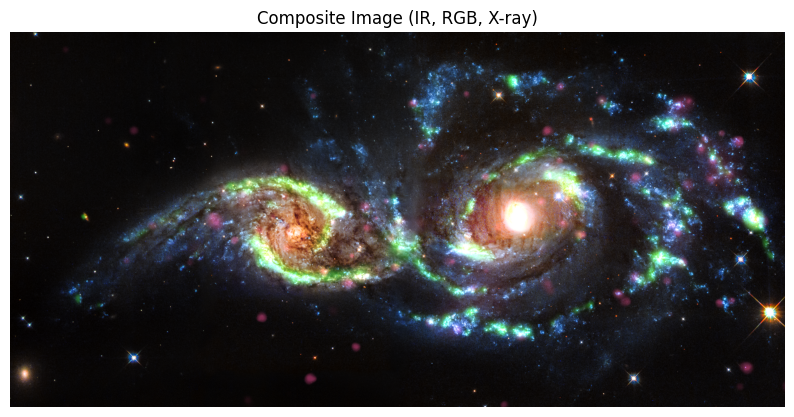

'Side Note: If you update any slider below, \nit will show you multiple pictures. The last image will be the updated one.'

In [ ]:
# Import Google Drive and mount it
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import ipywidgets as widgets
from IPython.display import display

# Paths to the FITS files in your Google Drive (update these paths with your actual directory structure)
xray_file = '/content/drive/MyDrive/camsustastro/filters/n2207_XRAY.fits'
ir_file = '/content/drive/MyDrive/camsustastro/filters/n2207_IR.fits'
rgb_files = [
    '/content/drive/MyDrive/camsustastro/filters/n2207_OPT_R.fits',
    '/content/drive/MyDrive/camsustastro/filters/n2207_OPT_G.fits',
    '/content/drive/MyDrive/camsustastro/filters/n2207_OPT_B.fits'
]

# Load the X-ray, IR, and RGB images
xray_data = fits.getdata(xray_file)
ir_data = fits.getdata(ir_file)
r_data = fits.getdata(rgb_files[0])
g_data = fits.getdata(rgb_files[1])
b_data = fits.getdata(rgb_files[2])

# Normalize the data to the range [0, 1]
xray_data = exposure.rescale_intensity(xray_data, in_range='image', out_range=(0, 1))
ir_data = exposure.rescale_intensity(ir_data, in_range='image', out_range=(0, 1))
r_data = exposure.rescale_intensity(r_data, in_range='image', out_range=(0, 1))
g_data = exposure.rescale_intensity(g_data, in_range='image', out_range=(0, 1))
b_data = exposure.rescale_intensity(b_data, in_range='image', out_range=(0, 1))

# Define function to update the image
def update_image(xray_intensity, ir_intensity, rgb_intensity):
    # Apply intensity scaling to each component
    scaled_xray = xray_data * xray_intensity
    scaled_ir = ir_data * ir_intensity
    scaled_rgb = np.dstack([r_data * rgb_intensity, g_data * rgb_intensity, b_data * rgb_intensity])

    # Convert X-ray data to a colored image (e.g., pink/purple hue)
    xray_colored = np.dstack([scaled_xray * 1.0, scaled_xray * 0.3, scaled_xray * 0.6])

    # Combine the IR data into a green hue image
    ir_colored = np.dstack([scaled_ir * 0.2, scaled_ir * 1.0, scaled_ir * 0.2])

    # Create the composite image
    composite_image = scaled_rgb + ir_colored + xray_colored

    # Clip the image to make sure the pixel values are within the valid range [0, 1]
    composite_image = np.clip(composite_image, 0, 1)

    # Display the composite image
    plt.figure(figsize=(10, 6))
    plt.imshow(composite_image)
    plt.title('Composite Image (IR, RGB, X-ray)')
    plt.axis('off')
    plt.show()

# Creating sliders for interactive control
xray_slider = widgets.FloatSlider(value=0.7, min=0, max=1, step=0.1, description='X-ray Intensity')
ir_slider = widgets.FloatSlider(value=0.8, min=0, max=1, step=0.1, description='IR Intensity')
rgb_slider = widgets.FloatSlider(value=1.0, min=0, max=1, step=0.1, description='RGB Intensity')

# Defining function to observe slider changes and update image accordingly
def changing_the_slider(change):
    update_image(xray_slider.value, ir_slider.value, rgb_slider.value)

# Observing slider value changes
xray_slider.observe(changing_the_slider, names='value')
ir_slider.observe(changing_the_slider, names='value')
rgb_slider.observe(changing_the_slider, names='value')

# Displaying the sliders and the initial image
display(xray_slider, ir_slider, rgb_slider)
update_image(xray_intensity=0.5, ir_intensity=0.8, rgb_intensity=1.0)


"""Side Note: If you update any slider below,
it will show you multiple pictures. The last image will be the updated one."""

#trial and error